In [53]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer, MinMaxScaler, PolynomialFeatures
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold,StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor  # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC, SVR # algoritmo SVM
from sklearn.neural_network import MLPRegressor



np.set_printoptions(suppress=True)


In [39]:
# Carregar o conjunto de dados do arquivo Excel
data = pd.read_excel('BaseFadiga - corrigida.xlsx')
data = pd.DataFrame(data)
data.drop(columns=['ID mistura'], inplace=True)

# Verificar o tamanho do conjunto de dados
n_linhas, n_colunas = data.shape
print(f"Número de linhas: {n_linhas}")
print(f"Número de colunas: {n_colunas}")

# Identificar o tipo de cada variável
display(data.info())

# Analisar estatísticas descritivas básicas para variáveis numéricas
print("Estatísticas descritivas básicas para variáveis numéricas:")
display(data.describe())

# Verificar a presença de valores ausentes ou dados inconsistentes
valores_ausentes = data.isnull().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes)


Número de linhas: 89
Número de colunas: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VB135   86 non-null     float64
 1   p200    89 non-null     float64
 2   p4      89 non-null     float64
 3   p38     89 non-null     float64
 4   p34     89 non-null     float64
 5   Teor    89 non-null     float64
 6   VMA     88 non-null     float64
 7   VFA     89 non-null     float64
 8   C11     89 non-null     float64
 9   C12     89 non-null     float64
 10  Gamma   89 non-null     int64  
 11  Delta   89 non-null     float64
 12  Alpha   89 non-null     float64
 13  Classe  89 non-null     int64  
dtypes: float64(12), int64(2)
memory usage: 9.9 KB


None

Estatísticas descritivas básicas para variáveis numéricas:


,VB135,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
count,86.000000,89.000000,89.000000,89.000000,89.000000,89.000000,88.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000
mean,882.168023,0.051554,0.487591,0.218623,0.015844,0.049891,0.153731,0.735174,0.000616,0.681640,1.527627e+09,-1.367416,3.262225,1.977528
std,662.393042,0.011766,0.071263,0.097850,0.026569,0.007027,0.012171,0.030344,0.001068,0.124059,1.303462e+10,0.224156,0.333053,0.768374
min,304.700000,0.032000,0.253520,0.017455,0.000000,0.036500,0.131300,0.645600,0.000002,0.406000,4.700000e+04,-2.342000,2.600000,1.000000
25%,389.600000,0.042000,0.456300,0.145600,0.000000,0.045000,0.146600,0.725000,0.000139,0.602000,3.000000e+06,-1.436000,3.030000,1.000000
50%,586.250000,0.054000,0.500000,0.208000,0.006000,0.050000,0.152000,0.740000,0.000246,0.685000,7.570000e+06,-1.340000,3.194000,2.000000
75%,1040.000000,0.058700,0.540000,0.295000,0.015600,0.055000,0.162000,0.749800,0.000627,0.752000,2.020000e+07,-1.234000,3.560000,3.000000
max,4380.000000,0.085231,0.617262,0.464000,0.167271,0.073000,0.192000,0.870000,0.006330,1.080000,1.230000e+11,-0.818000,4.341000,3.000000


Valores ausentes por coluna:
VB135     3
p200      0
p4        0
p38       0
p34       0
Teor      0
VMA       1
VFA       0
C11       0
C12       0
Gamma     0
Delta     0
Alpha     0
Classe    0
dtype: int64


In [40]:
data.dropna(inplace=True)

In [41]:
# Criação de interações entre variáveis
data['VB135_VMA'] = data['VB135'] * data['VMA']
data['p4_p38_sum'] = data['p4'] + data['p38']

# Transformações matemáticas
data['VB135_log'] = np.log(data['VB135'])
data['p4_squared'] = data['p4'] ** 2


# Normalização e padronização
data_normalized = (data - data.mean()) / data.std()

# Criação de atributos derivados
data['Densidade_mistura'] = data['Teor'] / data['VB135']

# Binning (discretização)
data['Teor_bins'] = pd.cut(data['Teor'], bins=3, labels=['baixo', 'médio', 'alto'])

# Variáveis de diferença
data['p4_p38_diff'] = data['p4'] - data['p38']

# Criação de variáveis estatísticas
data['Mean_C11_C12'] = (data['C11'] + data['C12']) / 2
data['Median_VB135'] = data['VB135'].median()
display(data)
# Exemplo de como salvar os dados transformados em um novo arquivo CSV
data.to_excel('dados_transformados.xlsx', index=False)


,VB135,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,...,Classe,VB135_VMA,p4_p38_sum,VB135_log,p4_squared,Densidade_mistura,Teor_bins,p4_p38_diff,Mean_C11_C12,Median_VB135
0,333.0,0.051,0.544,0.261,0.056,0.0370,0.140000,0.710000,0.000184,0.701,...,1,46.620000,0.805,5.808142,0.295936,0.000111,baixo,0.283,0.350592,587.5
1,333.0,0.050,0.564,0.341,0.067,0.0365,0.135000,0.700000,0.000108,0.752,...,1,44.955000,0.905,5.808142,0.318096,0.000110,baixo,0.223,0.376054,587.5
2,333.0,0.055,0.503,0.208,0.000,0.0400,0.148000,0.725000,0.000119,0.744,...,1,49.284000,0.711,5.808142,0.253009,0.000120,baixo,0.295,0.372059,587.5
3,333.0,0.055,0.509,0.295,0.000,0.0400,0.148000,0.740000,0.000167,0.737,...,1,49.284000,0.804,5.808142,0.259081,0.000120,baixo,0.214,0.368584,587.5
4,1025.0,0.051,0.544,0.261,0.056,0.0390,0.142000,0.730000,0.000240,0.664,...,1,145.550000,0.805,6.932448,0.295936,0.000038,baixo,0.283,0.332120,587.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,539.1,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.000213,0.681,...,2,86.201321,0.350,6.289901,0.090000,0.000107,médio,0.250,0.340607,587.5
84,513.4,0.040,0.360,0.160,0.000,0.0534,0.154846,0.743534,0.006330,0.406,...,2,79.497724,0.520,6.241055,0.129600,0.000104,médio,0.200,0.206165,587.5
85,513.4,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.003960,0.437,...,3,82.091928,0.350,6.241055,0.090000,0.000112,médio,0.250,0.220480,587.5
87,304.7,0.062,0.483,0.279,0.000,0.0572,0.173000,0.770000,0.000414,0.644,...,2,52.713100,0.762,5.719328,0.233289,0.000188,médio,0.204,0.322207,587.5


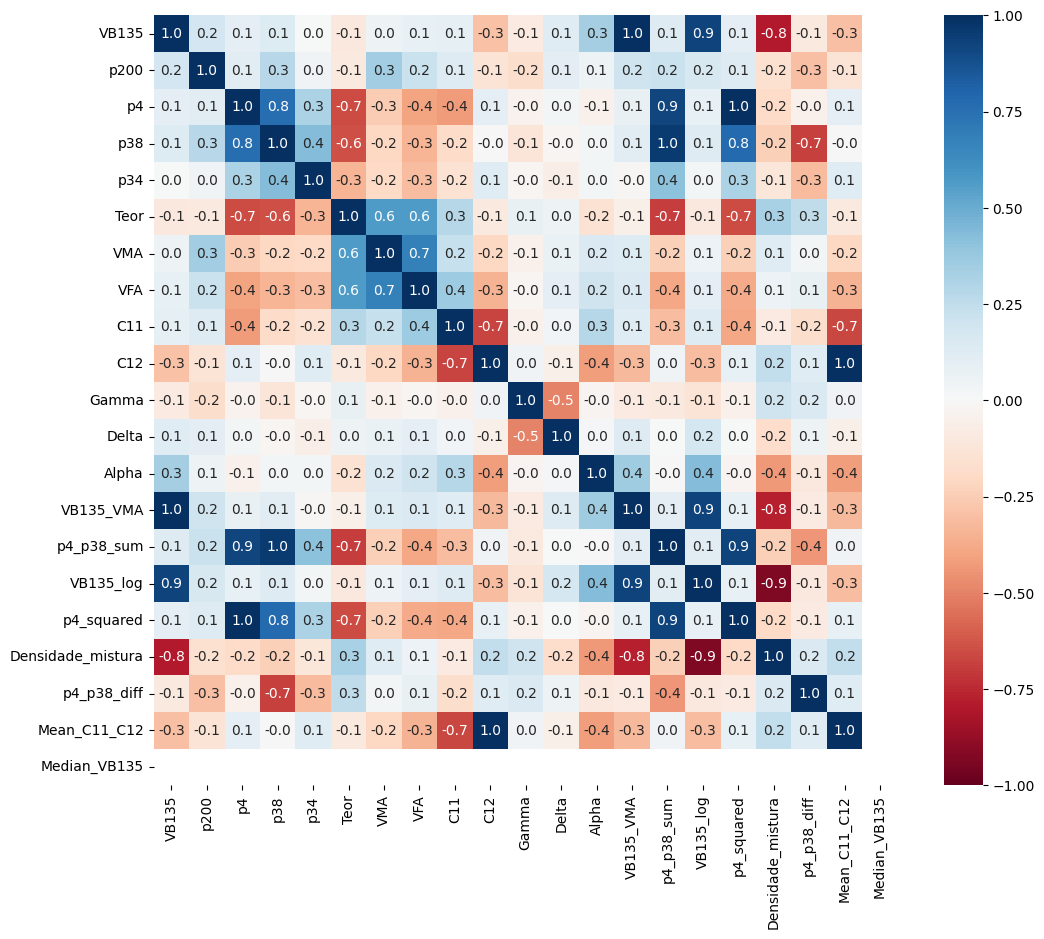

In [16]:
# Plotar gráficos de dispersão para as variáveis numéricas
variaveis_numericas = ['VB135', 'p200', 'p4', 'p38', 'p34', 'Teor', 'VMA',
                        'VFA', 'C11', 'C12', 'Gamma', 'Delta', 'Alpha', 'VB135_VMA',
                        'p4_p38_sum','VB135_log','p4_squared', 'Densidade_mistura',
                        'p4_p38_diff','Mean_C11_C12','Median_VB135']
sns.pairplot(data, hue = "Classe")

# pair plot 2 com Seaborn


#Visualizar a distribuição das variáveis numéricas usando histogramas
data[variaveis_numericas].hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

# Identificar correlações entre as variáveis
plt.figure(figsize=(12, 10))
correlacoes = data.drop(columns=['Classe', 'Teor_bins'])
correlacoes = correlacoes.corr()
sns.heatmap(correlacoes, annot=True, fmt=".1f",  cmap='RdBu', vmin=-1, vmax=1)

plt.show()


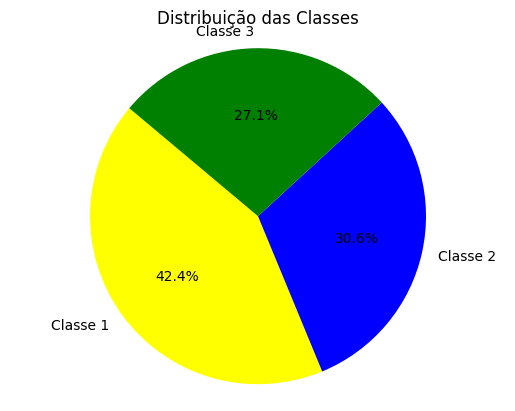

In [7]:
# Contar a quantidade de ocorrências de cada valor na coluna "Classe"
count_values = data['Classe'].value_counts()

# Criar o gráfico de pizza
labels = ['Classe 1', 'Classe 2', 'Classe 3']
colors = ['yellow', 'blue', 'green']
plt.pie(count_values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Adicionar um título ao gráfico
plt.title('Distribuição das Classes')

# Mostrar o gráfico
plt.axis('equal')  # Faz o gráfico de pizza ser desenhado como um círculo.
plt.show()

In [42]:
# Codificar variável categóricas
# Normalizar as variáveis numéricas
variaveis_numericas = ['VB135', 'p200', 'p4', 'p38', 'p34', 'Teor', 'VMA',
                        'VFA', 'C11', 'C12', 'Gamma', 'Delta', 'Alpha', 'VB135_VMA',
                        'p4_p38_sum','VB135_log','p4_squared', 'Densidade_mistura',
                        'p4_p38_diff','Mean_C11_C12']

scaler = MinMaxScaler()
data[variaveis_numericas] = scaler.fit_transform(data[variaveis_numericas])

# Visualizar o conjunto de dados após o pré-processamento
data.reset_index(inplace=True)
data.drop(columns=['index'], inplace=True)
display(data)

,VB135,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,...,Classe,VB135_VMA,p4_p38_sum,VB135_log,p4_squared,Densidade_mistura,Teor_bins,p4_p38_diff,Mean_C11_C12,Median_VB135
0,0.006944,0.356934,0.798588,0.545399,0.334786,0.013699,0.143328,0.286988,0.028689,0.437685,...,1,0.010063,0.660353,0.033320,0.731400,0.528235,baixo,0.579897,0.432627,587.5
1,0.006944,0.338148,0.853572,0.724552,0.400548,0.000000,0.060956,0.242424,0.016678,0.513353,...,1,0.007401,0.784312,0.033320,0.801362,0.520224,baixo,0.372267,0.508898,587.5
2,0.006944,0.432078,0.685871,0.426709,0.000000,0.095890,0.275124,0.353832,0.018416,0.501484,...,1,0.014323,0.543832,0.033320,0.595872,0.576299,baixo,0.621422,0.496932,587.5
3,0.006944,0.432078,0.702366,0.621539,0.000000,0.095890,0.275124,0.420677,0.026002,0.491098,...,1,0.014323,0.659113,0.033320,0.615042,0.576299,baixo,0.341123,0.486520,587.5
4,0.176748,0.356934,0.798588,0.545399,0.334786,0.068493,0.176277,0.376114,0.037539,0.382789,...,1,0.168242,0.660353,0.455123,0.731400,0.138438,baixo,0.579897,0.377295,587.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.057517,0.150288,0.127783,0.072882,0.000000,0.578082,0.471146,0.458746,0.033272,0.408012,...,2,0.073350,0.096341,0.214061,0.081226,0.505473,médio,0.465700,0.402716,587.5
81,0.051211,0.150288,0.292735,0.319217,0.000000,0.463014,0.387901,0.436426,1.000000,0.000000,...,2,0.062631,0.307071,0.195735,0.206250,0.490363,médio,0.292676,0.000000,587.5
82,0.051211,0.150288,0.127783,0.072882,0.000000,0.578082,0.471146,0.458746,0.625446,0.045994,...,3,0.066779,0.096341,0.195735,0.081226,0.534008,médio,0.465700,0.042880,587.5
83,0.000000,0.563580,0.630887,0.585708,0.000000,0.567123,0.686985,0.554367,0.065038,0.353116,...,2,0.019806,0.607051,0.000000,0.533613,0.936983,médio,0.306518,0.347601,587.5


In [55]:

# Gerar dados de exemplo
variaveis_numericas = ['VB135', 'p200', 'p4', 'p38', 'p34', 'Teor', 'VMA',
                        'VFA', 'C11', 'C12', 'Gamma', 'Delta', 'Alpha', 'VB135_VMA',
                        'p4_p38_sum','VB135_log','p4_squared', 'Densidade_mistura',
                        'p4_p38_diff','Mean_C11_C12','Median_VB135']

variaveis_entradas = ['VB135', 'p200', 'p4', 'p38', 'p34', 'Teor', 'VMA',
                        'VFA', 'VB135_VMA',
                        'p4_p38_sum','VB135_log','p4_squared', 'Densidade_mistura',
                        'p4_p38_diff','Median_VB135']

variaveis_saida = ['C11',	'C12', 'Mean_C11_C12',	'Gamma',	'Delta',	'Alpha']
X = data[variaveis_entradas]

for var in variaveis_saida:

    y = data[var]

    # Divida os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("SVR", SVR()),
    ("Neural Network", MLPRegressor())
]

    # Teste e avalie cada modelo
    for name, model in models:
        # Realize a validação cruzada para avaliar o modelo de forma mais robusta
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Variavel: {var}")
        print(f"Model: {name}")
        print(f"Cross-validated RMSE: {cv_rmse.mean():.2f} (+/- {cv_rmse.std():.2f})")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"R-squared: {r2:.2f}")
        print("="*50)

Variavel: C11
Model: Linear Regression
Cross-validated RMSE: 0.15 (+/- 0.09)
Mean Squared Error: 0.03
Mean Absolute Error: 0.10
R-squared: 0.37
Variavel: C11
Model: Ridge Regression
Cross-validated RMSE: 0.13 (+/- 0.09)
Mean Squared Error: 0.03
Mean Absolute Error: 0.10
R-squared: 0.30
Variavel: C11
Model: Lasso Regression
Cross-validated RMSE: 0.14 (+/- 0.09)
Mean Squared Error: 0.05
Mean Absolute Error: 0.11
R-squared: -0.11
Variavel: C11
Model: Decision Tree
Cross-validated RMSE: 0.24 (+/- 0.09)
Mean Squared Error: 0.09
Mean Absolute Error: 0.17
R-squared: -1.05
Variavel: C11
Model: Random Forest
Cross-validated RMSE: 0.17 (+/- 0.08)
Mean Squared Error: 0.05
Mean Absolute Error: 0.13
R-squared: -0.17
Variavel: C11
Model: Gradient Boosting
Cross-validated RMSE: 0.20 (+/- 0.09)
Mean Squared Error: 0.05
Mean Absolute Error: 0.13
R-squared: -0.17
Variavel: C11
Model: AdaBoost
Cross-validated RMSE: 0.18 (+/- 0.09)
Mean Squared Error: 0.05
Mean Absolute Error: 0.12
R-squared: -0.10
Variav

In [58]:
#Separação em bases de treino e teste (holdout)
array = data.values
X = array[:,0:8] # atributos
y = array[:,13] # classe (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # faz a divisão

# Definindo a métrica de avaliação dos algoritmos
scoring = 'accuracy'

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

KNN: 0.628571 (0.138914)
CART: 0.652381 (0.145297)
NB: 0.550000 (0.135296)
SVM: 0.635714 (0.122359)


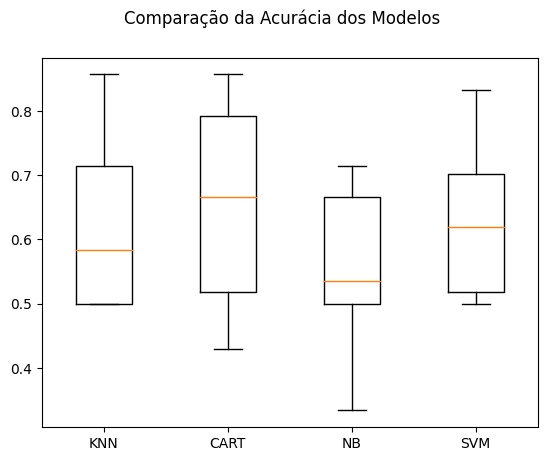

In [59]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7) 

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: MSE 0.04 (0.03) - RMSE 0.19 - R² -8.79
Ridge: MSE 0.03 (0.03) - RMSE 0.17 - R² -3.22
Lasso: MSE 0.03 (0.04) - RMSE 0.17 - R² -1.17
KNN: MSE 0.03 (0.03) - RMSE 0.18 - R² -5.26
CART: MSE 0.07 (0.04) - RMSE 0.27 - R² -18.75
SVM: MSE 0.04 (0.03) - RMSE 0.19 - R² -7.53


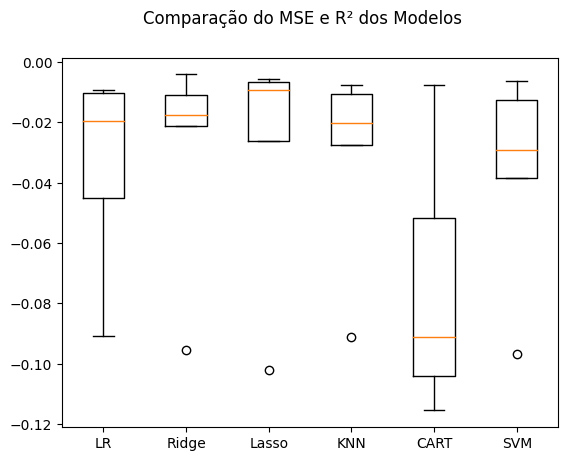

LR: MSE 0.05 (0.03) - RMSE 0.22 - R² -0.57
Ridge: MSE 0.04 (0.02) - RMSE 0.20 - R² -0.24
Lasso: MSE 0.04 (0.02) - RMSE 0.19 - R² -0.24
KNN: MSE 0.05 (0.02) - RMSE 0.21 - R² -0.51
CART: MSE 0.05 (0.02) - RMSE 0.22 - R² -0.84
SVM: MSE 0.05 (0.03) - RMSE 0.22 - R² -0.58


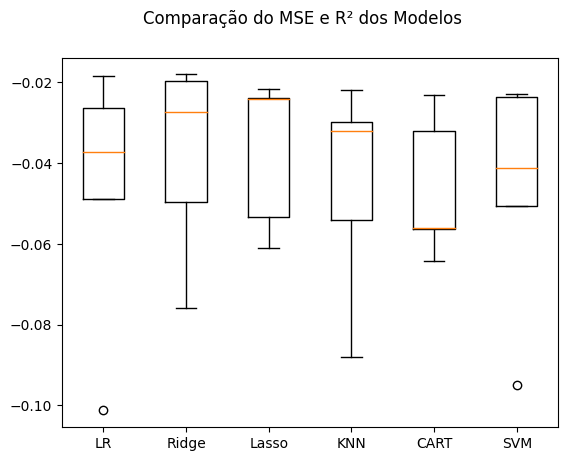

LR: MSE 0.02 (0.03) - RMSE 0.12 - R² -2817.07
Ridge: MSE 0.02 (0.03) - RMSE 0.12 - R² -777.43
Lasso: MSE 0.01 (0.03) - RMSE 0.12 - R² -445.44
KNN: MSE 0.01 (0.03) - RMSE 0.12 - R² -19.93
CART: MSE 0.03 (0.03) - RMSE 0.17 - R² -21.06
SVM: MSE 0.02 (0.02) - RMSE 0.15 - R² -10629.92


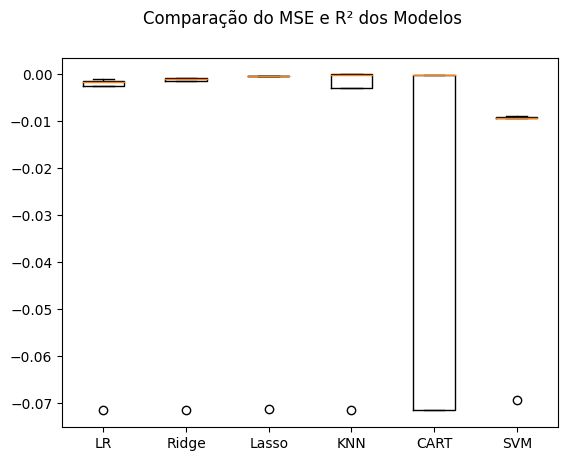

LR: MSE 0.03 (0.01) - RMSE 0.17 - R² -0.49
Ridge: MSE 0.03 (0.01) - RMSE 0.16 - R² -0.13
Lasso: MSE 0.02 (0.01) - RMSE 0.16 - R² -0.06
KNN: MSE 0.03 (0.02) - RMSE 0.16 - R² -0.07
CART: MSE 0.06 (0.03) - RMSE 0.25 - R² -1.76
SVM: MSE 0.03 (0.02) - RMSE 0.19 - R² -0.42


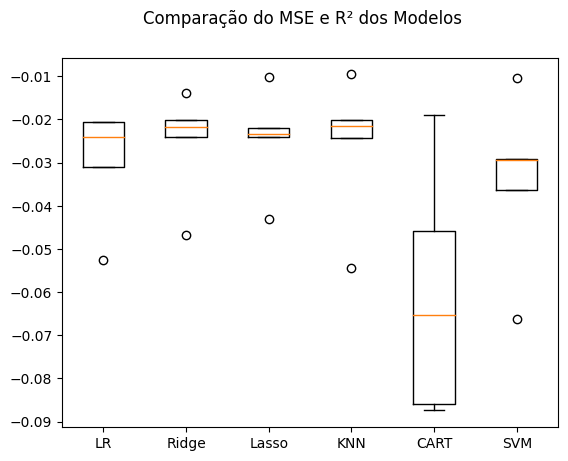

LR: MSE 0.05 (0.02) - RMSE 0.21 - R² -0.24
Ridge: MSE 0.04 (0.02) - RMSE 0.20 - R² 0.04
Lasso: MSE 0.04 (0.02) - RMSE 0.21 - R² -0.07
KNN: MSE 0.04 (0.01) - RMSE 0.19 - R² -0.03
CART: MSE 0.06 (0.02) - RMSE 0.24 - R² -0.66
SVM: MSE 0.04 (0.02) - RMSE 0.20 - R² -0.12


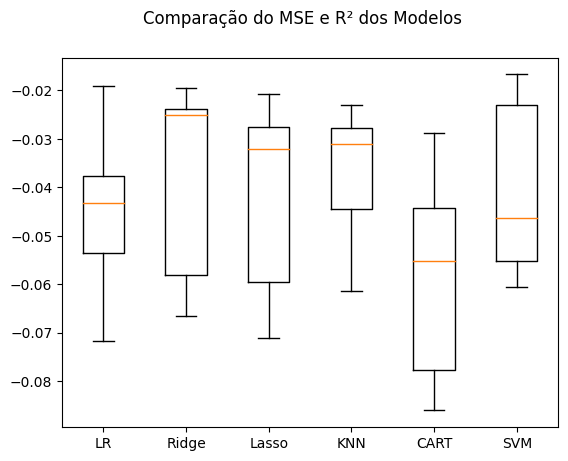

In [53]:
# Separação em bases de treino e teste (holdout)
array = data.values
X = array[:, 0:8]  # atributos
for i in [8, 9, 10, 11, 12]:
    y = array[:, i]  # classe (target)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)  # faz a divisão

    # Criando os folds para a validação cruzada
    num_particoes = 5  # número de folds da validação cruzada
    kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)  # faz o particionamento em 10 folds

    # Modelagem

    # Definindo uma seed global para esta célula de código
    np.random.seed(7)

    # Listas para armazenar os modelos, os resultados e os nomes dos modelos
    models = []
    results = []
    r2_scores = []
    names = []

    # Preparando os modelos e adicionando-os em uma lista
    models.append(('LR', LinearRegression()))
    models.append(('Ridge', Ridge()))
    models.append(('Lasso', Lasso()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor()))
    models.append(('SVM', SVR()))

    # Avaliando um modelo por vez
    for name, model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
        r2_cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
        results.append(cv_results)
        r2_scores.append(r2_cv_results)
        names.append(name)
        # imprime MSE, desvio padrão do MSE, RMSE e R² dos 10 resultados da validação cruzada
        msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f - R² %0.2f" % (
            name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())), r2_cv_results.mean()
        )
        print(msg)

    # Boxplot de comparação dos modelos
    fig, ax = plt.subplots()
    fig.suptitle('Comparação do MSE e R² dos Modelos')
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
